# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# Tentang Dataset

Dataset ini berisi data transaksi penjualan e-commerce berbasis di Inggris selama satu tahun.  
Toko yang berlokasi di London ini menjual berbagai hadiah dan perlengkapan rumah untuk anak-anak dan orang dewasa melalui situs web sejak 2007, dengan pelanggan dari berbagai negara.

Dataset mencakup **500 ribu baris dan 8 kolom**, dengan informasi sebagai berikut:

- **TransactionNo**: ID unik setiap transaksi (kode dengan huruf “C” menandakan pembatalan)  
- **Date**: tanggal transaksi  
- **ProductNo & Product**: kode dan nama produk  
- **Price**: harga per unit (dalam pound sterling)  
- **Quantity**: jumlah produk per transaksi (nilai negatif menandakan pembatalan)  
- **CustomerNo**: ID unik pelanggan  
- **Country**: negara asal pelanggan  

Sebagian kecil transaksi dibatalkan karena **stok produk habis**, di mana pelanggan memilih membatalkan pesanan agar semua produk dapat dikirim bersamaan.

Dataset ini diambil dari **Kaggle**:  
[An Online Shop Business](https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [33]:
import os
import shutil
import kagglehub

import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [8]:
path = kagglehub.dataset_download("gabrielramos87/an-online-shop-business")
print("Dataset berhasil diunduh ke:", path)

Dataset berhasil diunduh ke: C:\Users\Syamsi\.cache\kagglehub\datasets\gabrielramos87\an-online-shop-business\versions\7


In [ ]:
# lokasi dataset hasil download
source_path = path  

# folder tujuan
target_path = r"D:\Kuliah\Semester 7\Asah\Tugas Project\SMSML_Rizki-Muhammad-Syamsi\Eksperimen_SML_Rizki Muhammad Syamsi"
os.makedirs(target_path, exist_ok=True)

print("Target path:", target_path)

# pindahkan semua file dari folder kagglehub ke folder kerja
for file_name in os.listdir(source_path):
    full_file_name = os.path.join(source_path, file_name)
    
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, target_path)

print("Dataset berhasil dipindahkan ke:", target_path)

Target path: D:\Kuliah\Semester 7\Asah\Tugas Project\SMSML_Rizki-Muhammad-Syamsi\Eksperimen_SML_Rizki Muhammad Syamsi
Dataset berhasil dipindahkan ke: D:\Kuliah\Semester 7\Asah\Tugas Project\SMSML_Rizki-Muhammad-Syamsi\Eksperimen_SML_Rizki Muhammad Syamsi


<>:5: SyntaxWarning: "\K" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\K"? A raw string is also an option.
<>:5: SyntaxWarning: "\K" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\K"? A raw string is also an option.
C:\Users\Syamsi\AppData\Local\Temp\ipykernel_7300\2397432876.py:5: SyntaxWarning: "\K" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\K"? A raw string is also an option.
  target_path = "D:\Kuliah\Semester 7\Asah\Tugas Project\SMSML_Rizki-Muhammad-Syamsi\Eksperimen_SML_Rizki Muhammad Syamsi"


In [7]:
df = pd.read_csv(r"D:\Kuliah\Semester 7\Asah\Tugas Project\SMSML_Rizki-Muhammad-Syamsi\Eksperimen_SML_Rizki Muhammad Syamsi\Sales Transaction v.4a_Raw.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [10]:
# Untuk tampilan grafik yang rapi
plt.rcParams['figure.figsize'] = (10, 5)

In [12]:
# Tampilkan 5 data pertama
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [16]:
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [17]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


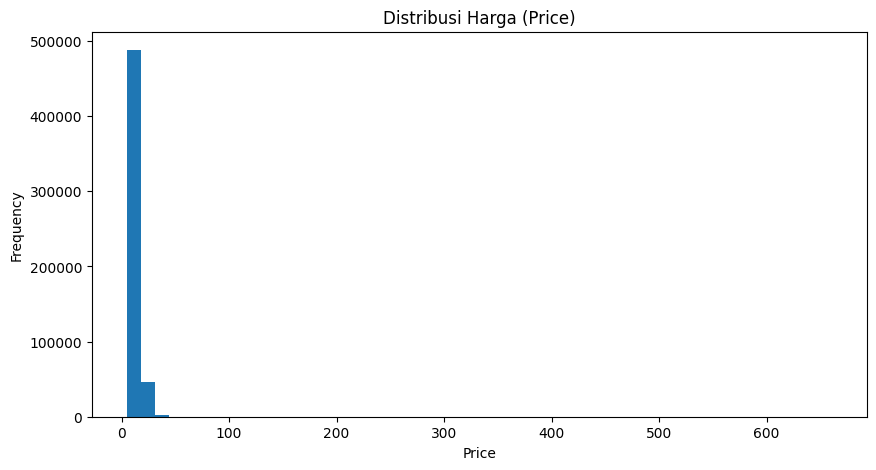

In [18]:
# Distribusi Price
plt.figure()
plt.hist(df['Price'], bins=50)
plt.title('Distribusi Harga (Price)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

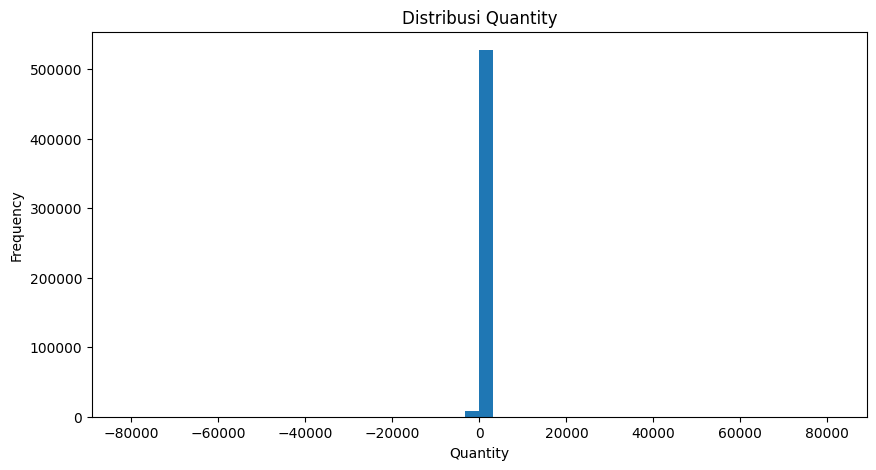

In [19]:
# Distribusi Quantity
plt.figure()
plt.hist(df['Quantity'], bins=50)
plt.title('Distribusi Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

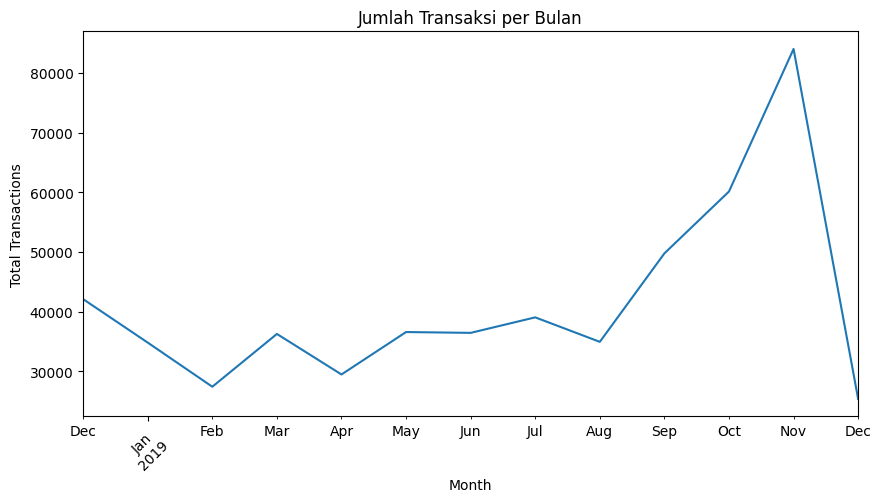

In [20]:
# Convert Date ke datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Transaksi per Bulan
df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('Month').size()

plt.figure()
monthly_sales.plot(kind='line')
plt.title("Jumlah Transaksi per Bulan")
plt.xlabel("Month")
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)
plt.show()

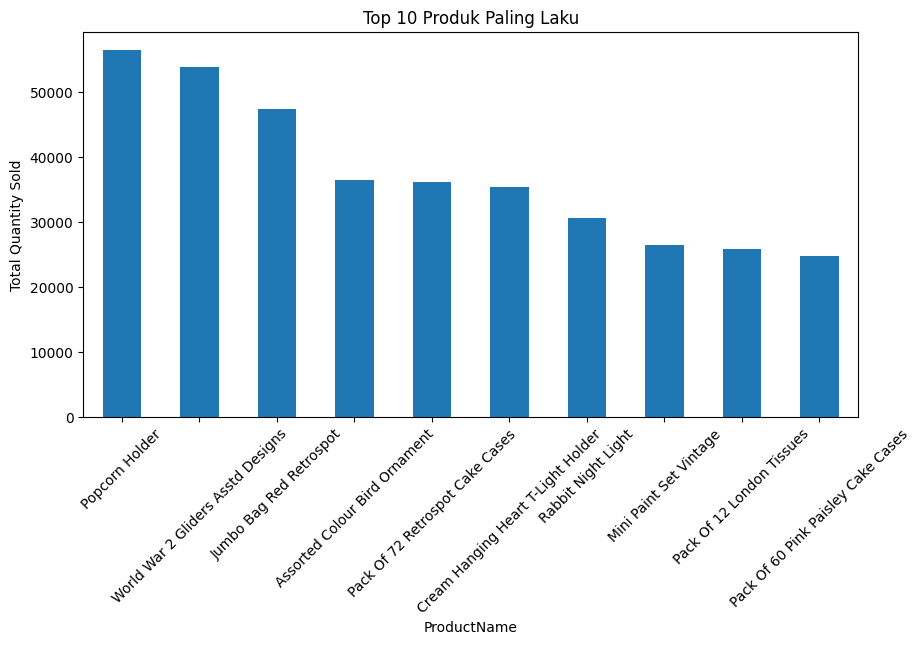

In [21]:
# Top 10 Produk Paling Laku
top_products = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_products.plot(kind='bar')
plt.title("Top 10 Produk Paling Laku")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

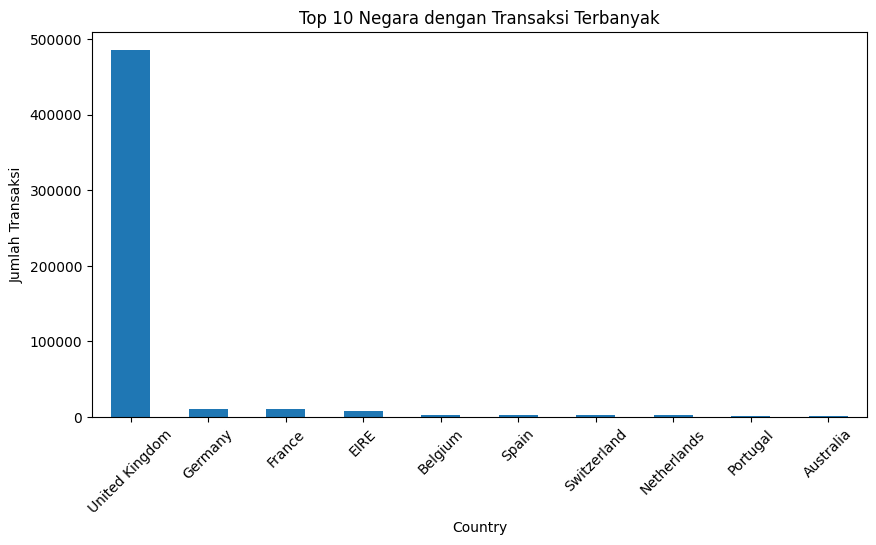

In [22]:
# Transaksi Berdasarkan Negar
country_sales = df['Country'].value_counts().head(10)

plt.figure()
country_sales.plot(kind='bar')
plt.title("Top 10 Negara dengan Transaksi Terbanyak")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
#Copy Data Frame
df_clean = df.copy()

In [24]:
# Hapus Duplikat
print("Jumlah data sebelum drop duplicates:", len(df_clean))
df_clean.drop_duplicates(inplace=True)
print("Jumlah data setelah drop duplicates:", len(df_clean))

Jumlah data sebelum drop duplicates: 536350
Jumlah data setelah drop duplicates: 531150


In [ ]:
# Perbaiki Format Date
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')

# Buang Baris yang Date-nya tidak valid
df_clean = df_clean.dropna(subset=['Date'])

In [ ]:
# Missing Value pada CustomerNo
df_clean['CustomerNo'] = df_clean['CustomerNo'].fillna("Unknown").astype(str)

In [27]:
# Hapus transaksi Pembatalan (TransactionNo yang diawali huruf 'C',Quantity < 0)
cancel_rows = df_clean[df_clean['Quantity'] < 0].shape[0]
print("Jumlah transaksi pembatalan:", cancel_rows)

df_clean = df_clean[df_clean['Quantity'] > 0]

Jumlah transaksi pembatalan: 8548


In [28]:
# Hapus data price <=0

invalid_price = df_clean[df_clean['Price'] <= 0].shape[0]
print("Jumlah baris dengan Price tidak valid:", invalid_price)

df_clean = df_clean[df_clean['Price'] > 0]

Jumlah baris dengan Price tidak valid: 0


In [31]:
# Buat kolom transaksi
df_clean['TotalValue'] = df_clean['Price'] * df_clean['Quantity']

In [32]:
# OUTLIER HANDLING (IQR METHOD)
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    print(f"Outlier boundaries for {col}: {lower} to {upper}")
    
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Terapkan pada kolom numerik
for column in ['Price', 'Quantity', 'TotalValue']:
    df_clean = remove_outliers_iqr(df_clean, column)

print("\nData setelah outlier removal:", df_clean.shape)

Outlier boundaries for Price: 6.664999999999998 to 18.545
Outlier boundaries for Quantity: -9.5 to 18.5
Outlier boundaries for TotalValue: -91.69 to 193.67000000000002

Data setelah outlier removal: (365139, 10)


In [34]:
# Encode dengan label encoder
le_customer = LabelEncoder()
df_clean['CustomerNo_enc'] = le_customer.fit_transform(df_clean['CustomerNo'])
df_clean['ProductNo_enc'] = LabelEncoder().fit_transform(df_clean['ProductNo'])


In [35]:
# encode dengan one-hot encode
df_clean = pd.get_dummies(df_clean, columns=['Country'], prefix='Country')


In [37]:
# Normalisasi Data
scaler = StandardScaler()

df_clean[['Price_scaled', 'Quantity_scaled', 'TotalValue_scaled']] = scaler.fit_transform(
    df_clean[['Price', 'Quantity', 'TotalValue']]
)

In [40]:
# Binning Price menjadi 4 kategori
df_clean['Price_bin'] = pd.qcut(df_clean['Price'], q=4, labels=['Very Low', 'Low', 'Medium', 'High'])

# Binning TotalValue menjadi 4 kategori
df_clean['TotalValue_bin'] = pd.qcut(df_clean['TotalValue'], q=4, 
                                     labels=['Very Low', 'Low', 'Medium', 'High'])

In [41]:
le_bin = LabelEncoder()
df_clean['Price_bin_enc'] = le_bin.fit_transform(df_clean['Price_bin'])
df_clean['TotalValue_bin_enc'] = le_bin.fit_transform(df_clean['TotalValue_bin'])

In [42]:
df_clean[['Price', 'Price_bin', 'Price_bin_enc']].head()

,Price,Price_bin,Price_bin_enc
2,11.53,Very Low,3
3,10.65,Very Low,3
4,11.94,Low,1
7,12.25,Low,1
8,10.65,Very Low,3


In [43]:
df_clean[['TotalValue', 'TotalValue_bin', 'TotalValue_bin_enc']].head()

,TotalValue,TotalValue_bin,TotalValue_bin_enc
2,138.36,High,0
3,127.80,High,0
4,71.64,Medium,2
7,147.00,High,0
8,127.80,High,0


In [44]:
# Simpan dataset bersih ke CSV
df_clean.to_csv("Sales Transaction v.4a_preprocessing.csv", index=False)

print("Dataset berhasil disimpan dengan nama: Sales Transaction v.4a_preprocessing.csv")


Dataset berhasil disimpan dengan nama: Sales Transaction v.4a_preprocessing.csv
